In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from scipy.optimize import curve_fit
import datetime as dt

In [2]:
# Define the exponential function
def func(x, a, b, c):
    return a * np.exp(b * x) + c

# Define some variables
prediction_span = 8

# Corona cases in Tunisia from Mar. 8 to yesterday
country_name = "Tunisia"
cases = [2,5,6,7,13,16,18,
         20,24,29,39,54,60,75,
         89
        ]


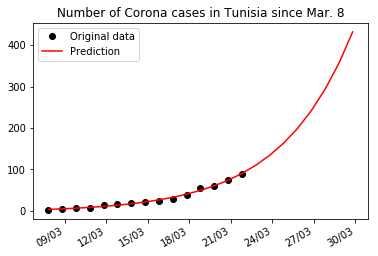

In [4]:
n_days = len(cases)

# Fit an exponential model
days = np.arange(0,n_days,1)
popt, pcov = curve_fit(func, days, cases)

# Plotting a figure
plt.figure()
# First, generate the dates for the X axis
now = dt.datetime.now()
now = dt.datetime.now() - dt.timedelta(days=1) # Uncomment if today's stats not available yet
then = now - dt.timedelta(days=n_days) 
future = now + dt.timedelta(days=prediction_span)
dates_1 = mdates.drange(then,now,dt.timedelta(days=1))
dates_2 = mdates.drange(then,future,dt.timedelta(days=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))
# Then plot
plt.plot(dates_1, cases, 'ko', label="Original data")
days = np.arange(0,n_days+prediction_span,1)
plt.plot(dates_2, func(days, *popt), 'r-', label="Prediction")
# And annotate the axis
plt.gcf().autofmt_xdate()
plt.title('Number of Corona cases in '+country_name+' since Mar. 8')
plt.legend()
plt.savefig(country_name+'.png')
plt.show()

In [5]:
#Predictions
print "Predicted number of cases in", country_name
for i in np.arange(0,prediction_span,1):
    print "- ", (dt.datetime.now()+dt.timedelta(days=i)).strftime("%d/%m/%Y"), "=",\
    int(round(func(n_days+i, *popt)))

Predicted number of cases in Tunisia
-  23/03/2020 = 110
-  24/03/2020 = 134
-  25/03/2020 = 163
-  26/03/2020 = 198
-  27/03/2020 = 241
-  28/03/2020 = 293
-  29/03/2020 = 356
-  30/03/2020 = 432
